# Plot signatures

In [99]:
import pandas
import pyogrio
import geopandas as gpd
from shapely.geometry import Point
import urbangrammar_graphics as ugg
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
import contextily

In [2]:
sns.set(context="paper", style="ticks", rc={'patch.force_edgecolor': False})

In [45]:
countryside = ['Wild countryside', 'Countryside agriculture', 'Urban buffer']
periphery = [
    'Open sprawl', 'Accessible suburbia', 'Disconnected suburbia', 'Warehouse/Park land'
]
urban = [
    'Concentrated urbanity',
    'Connected residential neighbourhoods',
    'Dense residential neighbourhoods',
    'Dense urban neighbourhoods',
    'Gridded residential quarters',
    'Hyper concentrated urbanity',
    'Local urbanity',
    'Metropolitan urbanity',
    'Regional urbanity'
]

signatures = {
    "0_0": "Countryside agriculture",
    "1_0": "Accessible suburbia",
    "3_0": "Open sprawl",
    "4_0": "Wild countryside",
    "5_0": "Warehouse/Park land",
    "6_0": "Gridded residential quarters",
    "7_0": "Urban buffer",
    "8_0": "Disconnected suburbia",
    "2_0": "Dense residential neighbourhoods",
    "2_1": "Connected residential neighbourhoods",
    "2_2": "Dense urban neighbourhoods",
    "9_0": "Local urbanity",
    "9_1": "Concentrated urbanity",
    "9_2": "Regional urbanity",
    "9_4": "Metropolitan urbanity",
    "9_5": "Hyper concentrated urbanity",
}

signatures_r = {signatures[i]: i for i in signatures}

## Coverage

From [here](https://urbangrammarai.xyz/spatial_signatures/esda/geog_distribution.html#coverage):

In [6]:
areas_str = """
Accessible suburbia 	2.244586e+09
Concentrated urbanity 	7.883216e+06
Connected residential neighbourhoods 	5.654034e+08
Countryside agriculture 	9.385615e+10
Dense residential neighbourhoods 	9.572622e+08
Dense urban neighbourhoods 	5.706291e+08
Disconnected suburbia 	7.089617e+08
Gridded residential quarters 	2.612541e+08
Hyper concentrated urbanity 	2.293596e+06
Local urbanity 	2.311573e+08
Metropolitan urbanity 	1.658261e+07
Open sprawl 	5.081598e+09
Regional urbanity 	7.643967e+07
Urban buffer 	3.158887e+10
Warehouse/Park land 	2.462472e+09
Wild countryside 	9.130631e+10
"""

Cell counts (from Martin):

In [42]:
counts_str = """
7_0	3686554
0_0	3022385
3_0	2561211
1_0	1962830
5_0	707211
4_0	595902
8_0	564318
2_0	502835
2_1	374090
2_2	238639
6_0	209959
9_0	86380
9_2	21760
9_4	3739
9_1	1390
9_5	264
"""

Merging:

In [43]:
from io import StringIO
areas = pandas.read_table(
    StringIO(areas_str), names=['Name', 'Area'], index_col='Name'
).rename(
    lambda n: n.strip(' ')
).eval(
    'Area_km = Area / 1e6'
).join(
    pandas.read_table(
        StringIO(counts_str), names=['Class', 'Count'], index_col='Class'
    ).rename(signatures)
)
areas

,Area,Area_km,Count
Name,,,
Accessible suburbia,2.244586e+09,2244.586000,1962830
Concentrated urbanity,7.883216e+06,7.883216,1390
Connected residential neighbourhoods,5.654034e+08,565.403400,374090
Countryside agriculture,9.385615e+10,93856.150000,3022385
Dense residential neighbourhoods,9.572622e+08,957.262200,502835
Dense urban neighbourhoods,5.706291e+08,570.629100,238639
Disconnected suburbia,7.089617e+08,708.961700,564318
Gridded residential quarters,2.612541e+08,261.254100,209959
Hyper concentrated urbanity,2.293596e+06,2.293596,264


- Percentages

In [44]:
pcts = pandas.Series({
    'countryside': areas.loc[
        countryside, 'Area_km'
    ].sum() * 100 / areas['Area_km'].sum(),
    'Periphery': areas.loc[
        periphery, 'Area_km'
    ].sum() * 100 / areas['Area_km'].sum(),
    'Urban': areas.loc[
        urban, 'Area_km'
    ].sum() * 100 / areas['Area_km'].sum()
}).round()
counts = pandas.Series({
    'countryside': areas.loc[
        countryside, 'Count'
    ].sum() * 100 / areas['Count'].sum(),
    'Periphery': areas.loc[
        periphery, 'Count'
    ].sum() * 100 / areas['Count'].sum(),
    'Urban': areas.loc[
        urban, 'Count'
    ].sum() * 100 / areas['Count'].sum()
}).round()
pandas.DataFrame({'Area': pcts, 'Cells': counts})

,Area,Cells
countryside,94.0,50.0
Periphery,5.0,40.0
Urban,1.0,10.0


## Spatial Signatures

In [54]:
cmap = ugg.get_colormap(len(signatures)+4, randomize=False)

In [55]:
cols = cmap.colors

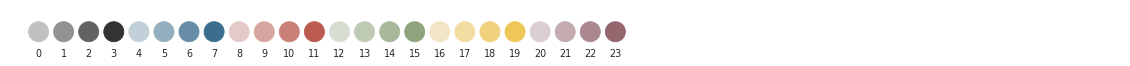

In [56]:
fig, ax = plt.subplots(figsize=(20, 5))
for i, c in enumerate(cols):
    ax.add_artist(plt.Circle((i, 0), 0.4, color=c))
    plt.text(i, -1, i, horizontalalignment='center')
    ax.set_axis_off()
    ax.set_aspect(1)
    ax.autoscale()
    plt.xlim(-1.25,43.25)
    plt.ylim(-1,1)

In [57]:
symbology = {
     '0_0': cols[16],
     '1_0': cols[15],
     '3_0': cols[9],
     '4_0': cols[12],
     '5_0': cols[21],
     '6_0': cols[8],
     '7_0': cols[4],
     '8_0': cols[18],
     '2_0': cols[6],
     '2_1': cols[23],
     '2_2': cols[19],
     '9_0': cols[7],
     '9_1': cols[3],
     '9_2': cols[22],
     '9_3': cols[0], # outlier
     '9_4': cols[11],
     '9_5': cols[14],
     '9_6': cols[0], # outlier
     '9_7': cols[0], # outlier
     '9_8': cols[0], # outlier
}

### Cluster colors

- Countryside

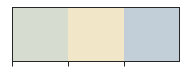

In [65]:
sns.palplot([symbology[signatures_r[i]] for i in countryside])

- Periphery

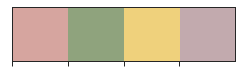

In [66]:
sns.palplot([symbology[signatures_r[i]] for i in periphery])

- Urban

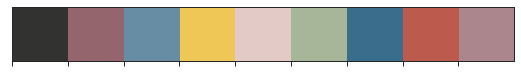

In [67]:
sns.palplot([symbology[signatures_r[i]] for i in urban])

### Great Britain

In [121]:
token = open("token.txt").read()

def add_maps(ax, crs, token=token, bg=True, lbls=True, roads=True):
    if roads:
        contextily.add_basemap(
            ax, 
            crs=crs, 
            source=ugg.get_tiles('roads', token), 
            zorder=2, 
            alpha=.2
        )
    if lbls:
        contextily.add_basemap(
            ax, 
            crs=crs, 
            source=ugg.get_tiles('labels', token), 
            zorder=3, 
            alpha=1
        )
    if bg:
        contextily.add_basemap(
            ax, 
            crs=crs, 
            source=ugg.get_tiles('background', token), 
            zorder=-1, 
            alpha=1
        )
    return ax

df = gpd.read_parquet('signatures_combined_levels_simplified.pq').to_crs(3857)

### Scottish Belt

#### All

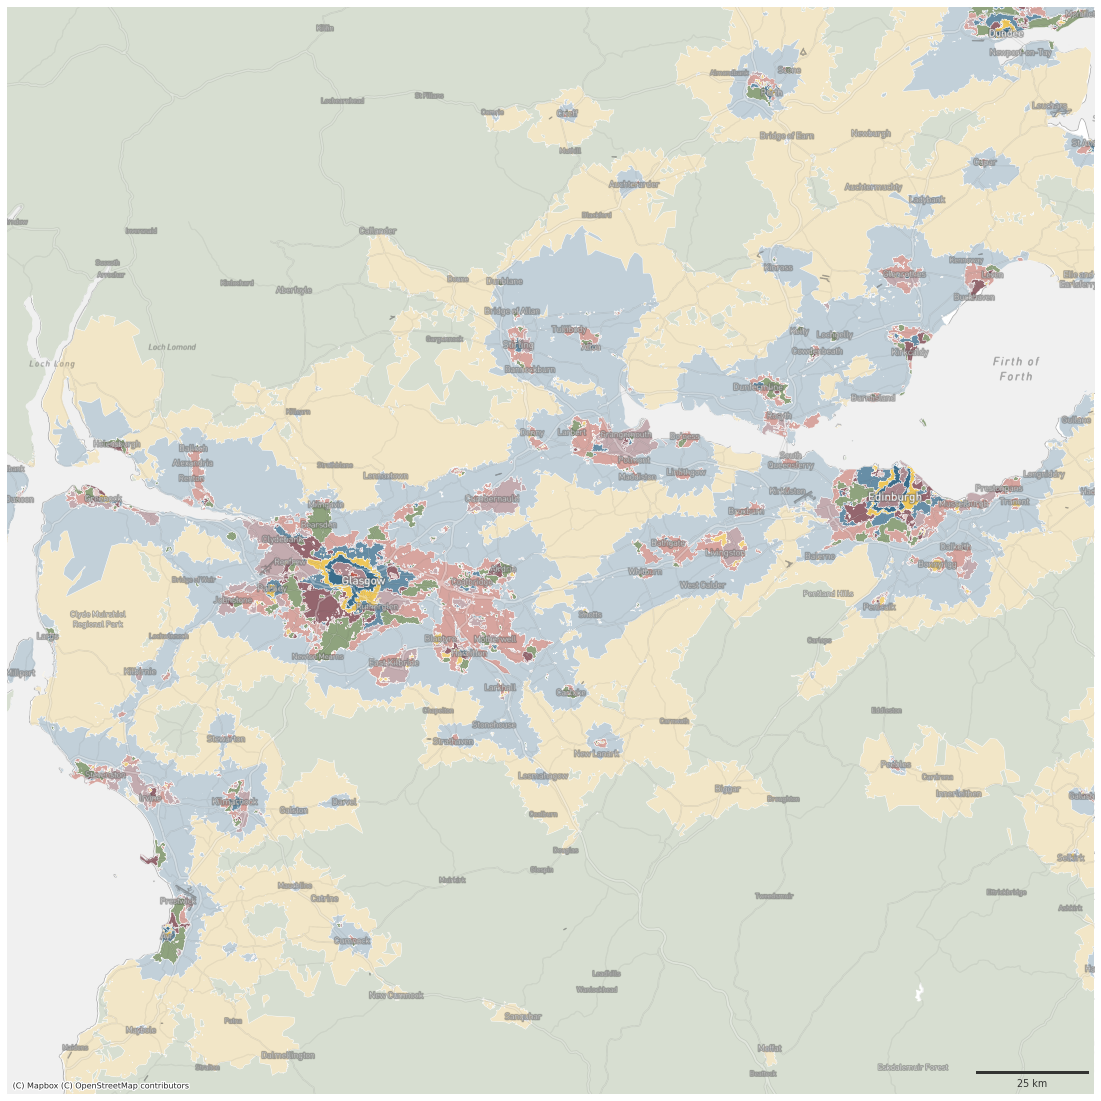

In [123]:
belt = gpd.GeoSeries([Point(-3.8718635546837663, 55.89080727223461)], crs=4326).to_crs(3857).buffer(120000).total_bounds

ax = df.plot(color=df['signature_type'].map(symbology), figsize=(20, 20), zorder=1, linewidth=.3, edgecolor='w', alpha=1)

ax.set_xlim(belt[0], belt[2])
ax.set_ylim(belt[1], belt[3])

contextily.add_basemap(ax, crs=df.crs, source=ugg.get_tiles('roads', token), zorder=2, alpha=.3)
contextily.add_basemap(ax, crs=df.crs, source=ugg.get_tiles('labels', token), zorder=3, alpha=1)
contextily.add_basemap(ax, crs=df.crs, source=ugg.get_tiles('background', token), zorder=-1, alpha=1)
ax.set_axis_off()

scalebar = ScaleBar(dx=1,
                    color=ugg.COLORS[0],
                    location='lower right',
                    height_fraction=0.002,
                    pad=.5,
                    frameon=False,
                    )
ax.add_artist(scalebar)

# ugg.north_arrow(plt.gcf(), ax, 0, size=.05, linewidth=1, color=ugg.COLORS[0], loc="upper left", pad=.002, alpha=.9)

# custom_points = [Line2D([0], [0], marker="o", linestyle="none", markersize=10, color=color) for color in symbology.values()]
# leg_points = ax.legend(custom_points, symbology.keys(), bbox_to_anchor=(1.05, 1), loc='upper left', frameon=True)
# ax.add_artist(leg_points)
plt.savefig("../fig/empirical/signatures_scottish_belt.png", dpi=300, bbox_inches="tight")

#### Countryside

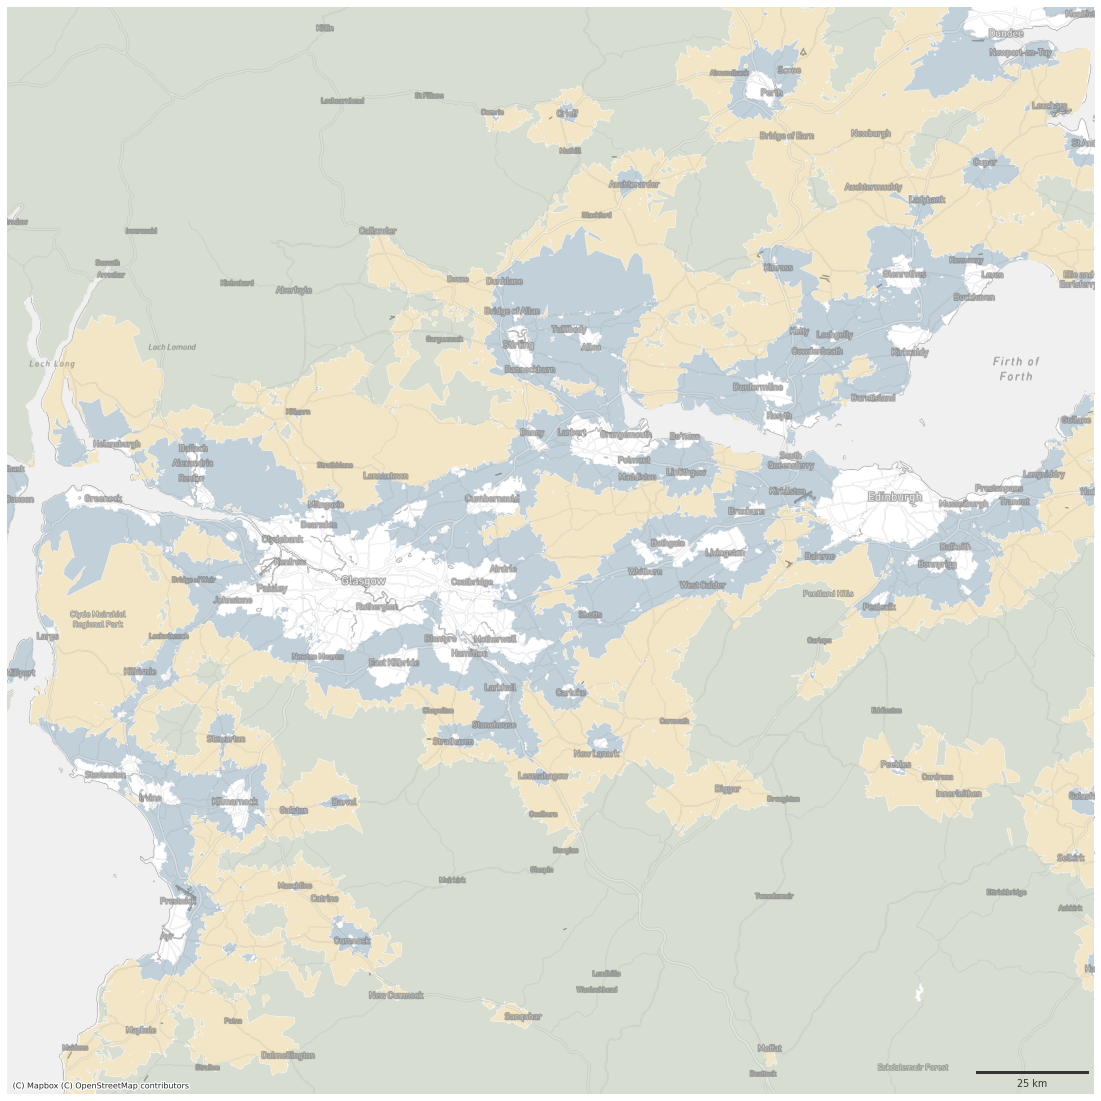

In [124]:
belt = gpd.GeoSeries([Point(-3.8718635546837663, 55.89080727223461)], crs=4326).to_crs(3857).buffer(120000).total_bounds

selection = [signatures_r[i] for i in countryside]
ax = df[
    df.signature_type.isin(selection)
].plot(
    color=df[
        df.signature_type.isin(selection)
    ]['signature_type'].map(symbology), 
    figsize=(20, 20), 
    zorder=1, 
    linewidth=.3, 
    edgecolor='w', 
    alpha=1
)

ax.set_xlim(belt[0], belt[2])
ax.set_ylim(belt[1], belt[3])

contextily.add_basemap(ax, crs=df.crs, source=ugg.get_tiles('roads', token), zorder=2, alpha=.3)
contextily.add_basemap(ax, crs=df.crs, source=ugg.get_tiles('labels', token), zorder=3, alpha=1)
contextily.add_basemap(ax, crs=df.crs, source=ugg.get_tiles('background', token), zorder=-1, alpha=1)
ax.set_axis_off()

scalebar = ScaleBar(dx=1,
                    color=ugg.COLORS[0],
                    location='lower right',
                    height_fraction=0.002,
                    pad=.5,
                    frameon=False,
                    )
ax.add_artist(scalebar)

# ugg.north_arrow(plt.gcf(), ax, 0, size=.05, linewidth=1, color=ugg.COLORS[0], loc="upper left", pad=.002, alpha=.9)

# custom_points = [Line2D([0], [0], marker="o", linestyle="none", markersize=10, color=color) for color in symbology.values()]
# leg_points = ax.legend(custom_points, symbology.keys(), bbox_to_anchor=(1.05, 1), loc='upper left', frameon=True)
# ax.add_artist(leg_points)
plt.savefig("../fig/empirical/signatures_scottish_belt_countryside.png", dpi=300, bbox_inches="tight")

#### Periphery

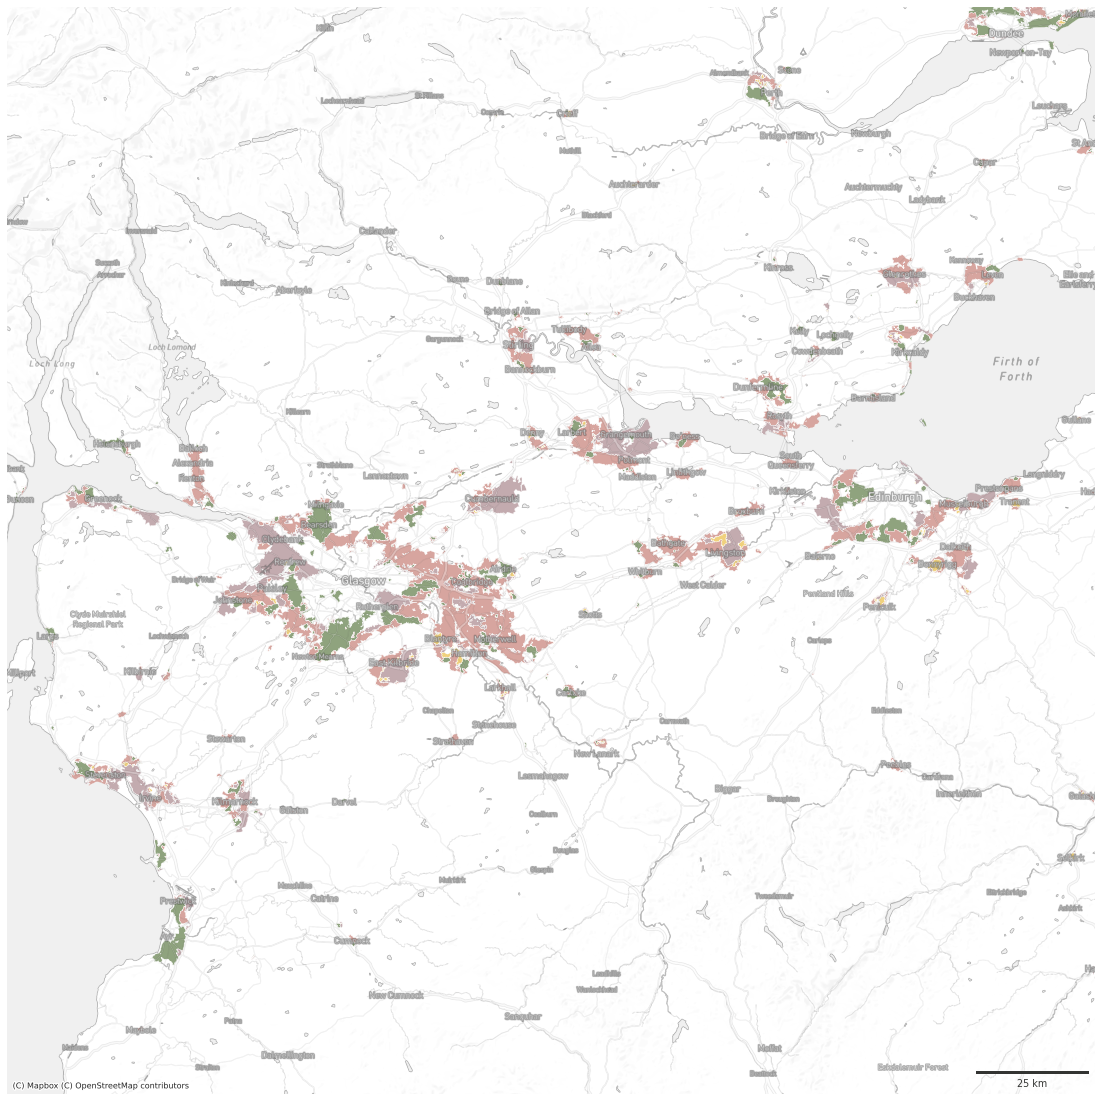

In [125]:
belt = gpd.GeoSeries([Point(-3.8718635546837663, 55.89080727223461)], crs=4326).to_crs(3857).buffer(120000).total_bounds

selection = [signatures_r[i] for i in periphery]
ax = df[
    df.signature_type.isin(selection)
].plot(
    color=df[
        df.signature_type.isin(selection)
    ]['signature_type'].map(symbology), 
    figsize=(20, 20), 
    zorder=1, 
    linewidth=.3, 
    edgecolor='w', 
    alpha=1
)

ax.set_xlim(belt[0], belt[2])
ax.set_ylim(belt[1], belt[3])

contextily.add_basemap(ax, crs=df.crs, source=ugg.get_tiles('roads', token), zorder=2, alpha=.3)
contextily.add_basemap(ax, crs=df.crs, source=ugg.get_tiles('labels', token), zorder=3, alpha=1)
contextily.add_basemap(ax, crs=df.crs, source=ugg.get_tiles('background', token), zorder=-1, alpha=1)
ax.set_axis_off()

scalebar = ScaleBar(dx=1,
                    color=ugg.COLORS[0],
                    location='lower right',
                    height_fraction=0.002,
                    pad=.5,
                    frameon=False,
                    )
ax.add_artist(scalebar)

# ugg.north_arrow(plt.gcf(), ax, 0, size=.05, linewidth=1, color=ugg.COLORS[0], loc="upper left", pad=.002, alpha=.9)

# custom_points = [Line2D([0], [0], marker="o", linestyle="none", markersize=10, color=color) for color in symbology.values()]
# leg_points = ax.legend(custom_points, symbology.keys(), bbox_to_anchor=(1.05, 1), loc='upper left', frameon=True)
# ax.add_artist(leg_points)
plt.savefig("../fig/empirical/signatures_scottish_belt_periphery.png", dpi=300, bbox_inches="tight")

#### Urban

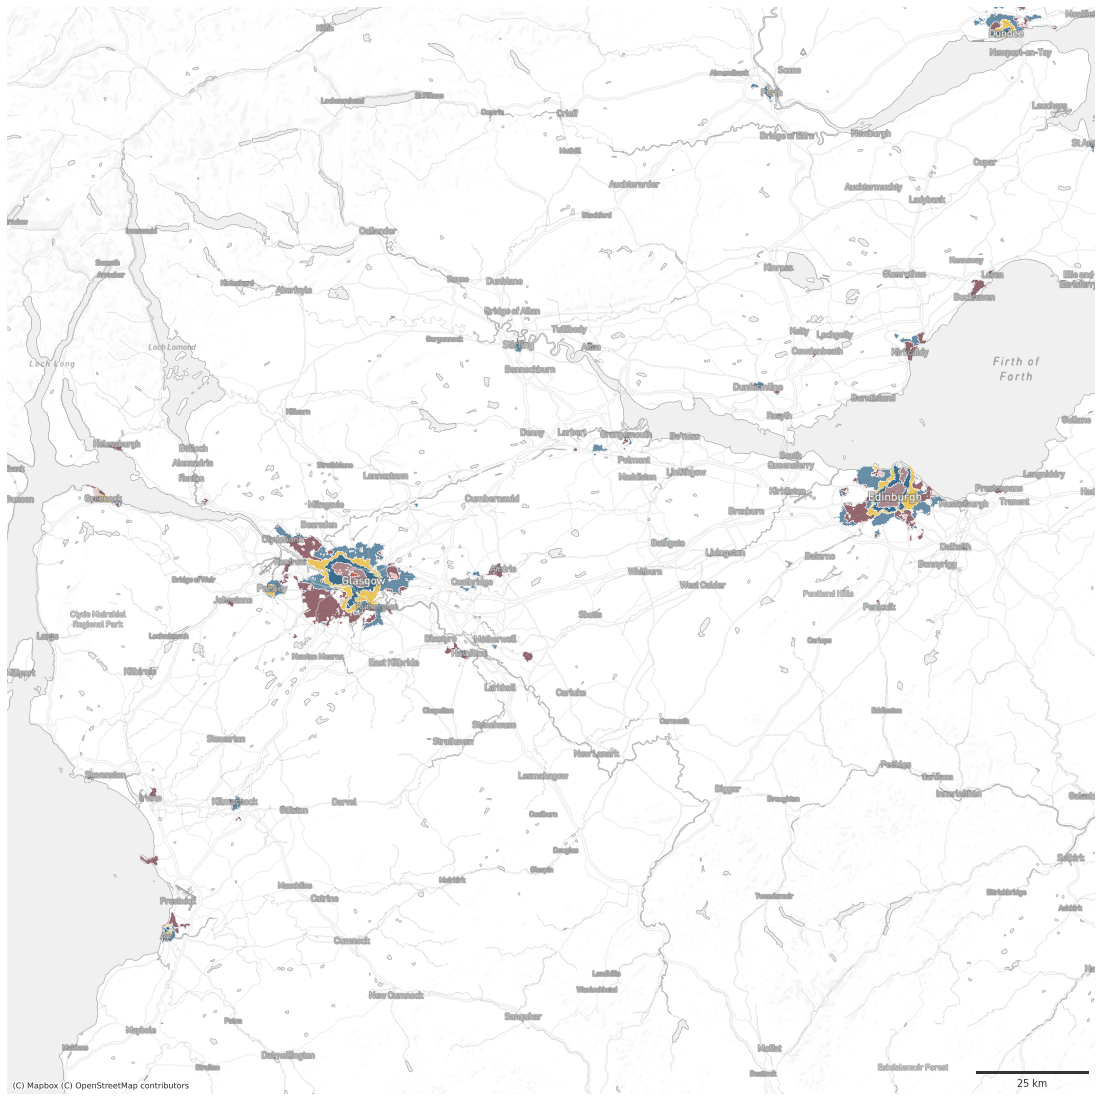

In [127]:
belt = gpd.GeoSeries([Point(-3.8718635546837663, 55.89080727223461)], crs=4326).to_crs(3857).buffer(120000).total_bounds

selection = [signatures_r[i] for i in urban]
ax = df[
    df.signature_type.isin(selection)
].plot(
    color=df[
        df.signature_type.isin(selection)
    ]['signature_type'].map(symbology), 
    figsize=(20, 20), 
    zorder=1, 
    linewidth=.3, 
    edgecolor='w', 
    alpha=1
)

ax.set_xlim(belt[0], belt[2])
ax.set_ylim(belt[1], belt[3])

contextily.add_basemap(ax, crs=df.crs, source=ugg.get_tiles('roads', token), zorder=2, alpha=.3)
contextily.add_basemap(ax, crs=df.crs, source=ugg.get_tiles('labels', token), zorder=3, alpha=1)
contextily.add_basemap(ax, crs=df.crs, source=ugg.get_tiles('background', token), zorder=-1, alpha=1)
ax.set_axis_off()

scalebar = ScaleBar(dx=1,
                    color=ugg.COLORS[0],
                    location='lower right',
                    height_fraction=0.002,
                    pad=.5,
                    frameon=False,
                    )
ax.add_artist(scalebar)

# ugg.north_arrow(plt.gcf(), ax, 0, size=.05, linewidth=1, color=ugg.COLORS[0], loc="upper left", pad=.002, alpha=.9)

# custom_points = [Line2D([0], [0], marker="o", linestyle="none", markersize=10, color=color) for color in symbology.values()]
# leg_points = ax.legend(custom_points, symbology.keys(), bbox_to_anchor=(1.05, 1), loc='upper left', frameon=True)
# ax.add_artist(leg_points)
plt.savefig("../fig/empirical/signatures_scottish_belt_urban.png", dpi=300, bbox_inches="tight")